<a href="https://colab.research.google.com/github/Sindhura-tr/Machine_Learning_9_11am/blob/main/K_Means_and_Hierarchal_Clustering_9_11am.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## K-Means CLustering - Unsupervised Machine Learning algorithm
Clusters are formed on basis of Elucidean distance calculated between each datapoint and centroid

## Evaluation metrics are :
Cluster formation:
### Inertia:
intra cluster distance: within the cluster, the distance between datapoints should be minimal

inter cluster distance: in between the multiple clusters, the distance should be maximum

### Silhoutee score:
the datapoint maintains minimum distance within other datapoints in the cluster
and also this datapint maintains maximum distance with other datapoint of other cluster

In [1]:
%pip install yellowbrick

In [2]:
%pip install plotly nbformat

In [3]:
import pandas as pd
path = r"https://raw.githubusercontent.com/Sindhura-tr/Datasets/refs/heads/main/Mall_Customers.csv"
df = pd.read_csv(path)
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [5]:
df.isna().sum()

,0
CustomerID,0
Genre,0
Age,0
Annual Income (k$),0
Spending Score (1-100),0


In [6]:
df.duplicated().sum()

np.int64(0)

## Define X features: These are the features on basis of which clustering should be performed

In [7]:
X = df.drop(columns=["CustomerID","Genre"])
X.head()

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40


In [8]:
X.columns = ["Age","Income","Spending"]

In [9]:
X.head()

,Age,Income,Spending
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40


## Data Preprocessing and Data cleaning

In [10]:
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline

In [11]:
con_pipe = make_pipeline(
    SimpleImputer(strategy="mean"),
    StandardScaler()
).set_output(transform="pandas")

In [12]:
con_pipe

Pipeline(steps=[('simpleimputer', SimpleImputer()),
                ('standardscaler', StandardScaler())])

In [13]:
X_pre = con_pipe.fit_transform(X)
X_pre.head()

,Age,Income,Spending
0,-1.424569,-1.738999,-0.434801
1,-1.281035,-1.738999,1.195704
2,-1.352802,-1.700830,-1.715913
3,-1.137502,-1.700830,1.040418
4,-0.563369,-1.662660,-0.395980


## Build the model: K- Means

In [14]:
from sklearn.cluster import KMeans

In [15]:
from yellowbrick.cluster import kelbow_visualizer

In [16]:
model = KMeans(n_clusters=5)
model.fit_predict(X_pre)

array([1, 4, 1, 4, 1, 4, 1, 4, 0, 4, 0, 4, 0, 4, 1, 4, 1, 4, 0, 4, 1, 4,
       0, 4, 0, 4, 0, 4, 1, 4, 0, 4, 0, 4, 0, 4, 0, 4, 1, 4, 0, 4, 0, 1,
       0, 4, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 3, 3, 1, 3, 2, 3, 2, 3, 2, 3,
       1, 3, 1, 3, 2, 3, 1, 3, 2, 3, 1, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 0, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3], dtype=int32)

## kelbow_visualizer

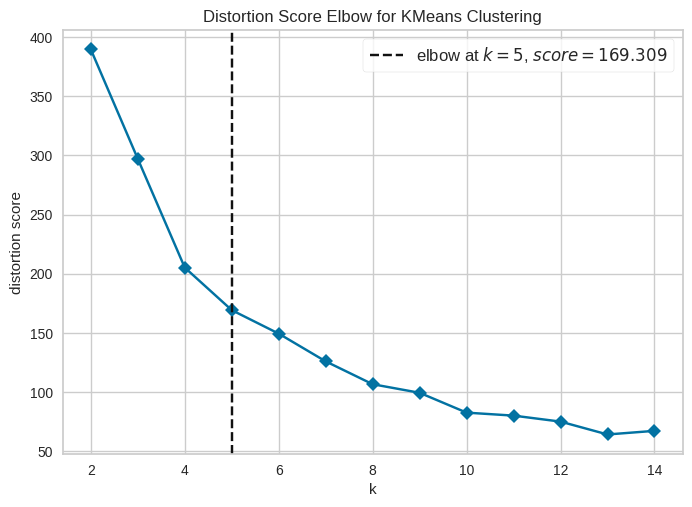

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [17]:
base_model = KMeans()
visualizer = kelbow_visualizer(base_model,X_pre,k=(2,15),timings=False)
visualizer.show()

In [18]:
best_kmeans = KMeans(n_clusters=6)
clusters = best_kmeans.fit_predict(X_pre)
clusters

array([0, 0, 4, 0, 0, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0,
       4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 1, 0, 4, 0,
       4, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 5, 0, 0, 0, 1, 1, 1, 1, 0, 5, 3, 3, 2, 3, 5, 3, 5, 3, 5, 3,
       2, 3, 2, 3, 5, 3, 2, 3, 5, 3, 2, 3, 2, 3, 5, 3, 2, 3, 5, 3, 5, 3,
       5, 3, 2, 3, 2, 3, 5, 3, 2, 3, 5, 3, 5, 3, 2, 3, 5, 3, 2, 3, 5, 3,
       5, 3, 5, 3, 2, 3, 5, 3, 5, 3, 5, 3, 5, 3, 2, 3, 2, 3, 5, 3, 5, 3,
       2, 3], dtype=int32)

In [19]:
# Centroids of each cluster
best_kmeans.cluster_centers_

array([[-0.98067852, -0.74305983,  0.46744035],
       [ 1.20427626, -0.25619985, -0.04067824],
       [-0.67101855,  0.98295822, -1.27674408],
       [-0.42880597,  0.97484722,  1.21608539],
       [ 0.5310735 , -1.2905084 , -1.23646671],
       [ 0.61779159,  0.95830714, -1.11903149]])

In [20]:
X.head()

,Age,Income,Spending
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40


In [21]:
X["Clusters"] = clusters
X.head()

,Age,Income,Spending,Clusters
0,19,15,39,0
1,21,15,81,0
2,20,16,6,4
3,23,16,77,0
4,31,17,40,0


In [22]:
for i in range(6):
  print(f"Details of cluster {i}")
  display(X[X["Clusters"]==i])
  print("------------------------")

Details of cluster 0


,Age,Income,Spending,Clusters
0,19,15,39,0
1,21,15,81,0
3,23,16,77,0
4,31,17,40,0
5,22,17,76,0
7,23,18,94,0
9,30,19,72,0
11,35,19,99,0
13,24,20,77,0
15,22,20,79,0


------------------------
Details of cluster 1


,Age,Income,Spending,Clusters
40,65,38,35,1
46,50,40,55,1
50,49,42,52,1
53,59,43,60,1
54,50,43,45,1
55,47,43,41,1
56,51,44,50,1
57,69,44,46,1
59,53,46,46,1
60,70,46,56,1


------------------------
Details of cluster 2


,Age,Income,Spending,Clusters
124,23,70,29,2
132,25,72,34,2
134,20,73,5,2
138,19,74,10,2
142,28,76,40,2
144,25,77,12,2
148,34,78,22,2
156,37,78,1,2
158,34,78,1,2
162,19,81,5,2


------------------------
Details of cluster 3


,Age,Income,Spending,Clusters
122,40,69,58,3
123,39,69,91,3
125,31,70,77,3
127,40,71,95,3
129,38,71,75,3
131,39,71,75,3
133,31,72,71,3
135,29,73,88,3
137,32,73,73,3
139,35,74,72,3


------------------------
Details of cluster 4


,Age,Income,Spending,Clusters
2,20,16,6,4
6,35,18,6,4
8,64,19,3,4
10,67,19,14,4
12,58,20,15,4
14,37,20,13,4
16,35,21,35,4
18,52,23,29,4
20,35,24,35,4
22,46,25,5,4


------------------------
Details of cluster 5


,Age,Income,Spending,Clusters
112,38,64,42,5
121,38,67,40,5
126,43,71,35,5
128,59,71,11,5
130,47,71,9,5
136,44,73,7,5
140,57,75,5,5
146,48,77,36,5
150,43,78,17,5
152,44,78,20,5


------------------------


## Metrics:
Inertia

In [23]:
best_kmeans.inertia_

152.59625097515163

## Plot the clusters for this model

In [24]:
import plotly.express as px

In [25]:
fig = px.scatter_3d(data_frame=X,x="Age",y="Income",z="Spending",color="Clusters")
fig.show()

## Hierarchal Clustering => Agglomerative Clustering
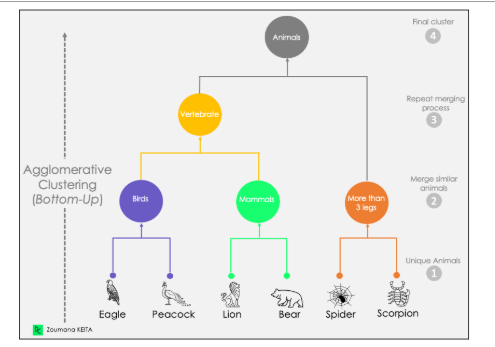

In [26]:
from sklearn.cluster import AgglomerativeClustering

In [27]:
X.head()

,Age,Income,Spending,Clusters
0,19,15,39,0
1,21,15,81,0
2,20,16,6,4
3,23,16,77,0
4,31,17,40,0


In [29]:
Xnew = X.drop(columns=["Clusters"])
Xnew.head()

,Age,Income,Spending
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40


In [30]:
agc = AgglomerativeClustering(n_clusters=7)
agc.fit(Xnew)

AgglomerativeClustering(n_clusters=7)

In [33]:
l1 = agc.labels_
l1

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 2, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 2,
       4, 2, 1, 2, 2, 2, 1, 2, 2, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 2,
       1, 1, 2, 2, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 2,
       1, 1, 1, 2, 1, 1, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 1, 2, 1, 1, 1, 1,
       1, 2, 1, 2, 2, 2, 1, 1, 1, 1, 2, 1, 1, 0, 2, 0, 5, 0, 5, 0, 5, 0,
       2, 0, 5, 0, 5, 0, 5, 0, 5, 0, 2, 0, 5, 0, 5, 0, 5, 0, 5, 0, 5, 0,
       5, 0, 5, 0, 5, 0, 5, 0, 5, 0, 5, 0, 5, 0, 5, 0, 5, 0, 5, 0, 5, 0,
       5, 0, 5, 0, 6, 0, 6, 0, 6, 0, 6, 0, 6, 0, 6, 0, 6, 0, 6, 0, 6, 0,
       6, 0])

In [32]:
from sklearn.metrics import silhouette_score

In [34]:
silhouette_score(Xnew,l1)

np.float64(0.4262301125101286)

In [35]:
agc1 = AgglomerativeClustering(n_clusters=4)
agc1.fit(Xnew)

AgglomerativeClustering(n_clusters=4)

In [36]:
l2 = agc1.labels_
l2

array([0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3,
       0, 3, 0, 3, 0, 0, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 1, 2, 1, 2, 1, 2,
       0, 2, 1, 2, 1, 2, 1, 2, 1, 2, 0, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2])

In [37]:
silhouette_score(Xnew,l2)

np.float64(0.41037986351850747)

In [40]:
# create a range of data for k clusters
import numpy as np
ks = np.arange(start=2,stop=16,step=1)
ks

array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15])

In [42]:
sil_scores = []
for i in ks:
  # create a agglomerative model
  agc = AgglomerativeClustering(n_clusters=i)
  agc.fit(Xnew)
  # generate labels and store them
  lab = agc.labels_

  # generate silhoutte score
  ss = silhouette_score(Xnew,lab)

  # add the silhoutte scores to sil_scores
  sil_scores.append(ss)
print(sil_scores)


[np.float64(0.2992593203550994), np.float64(0.38141795042544546), np.float64(0.41037986351850747), np.float64(0.4401889024290193), np.float64(0.44308912983504156), np.float64(0.4262301125101286), np.float64(0.41028404899198817), np.float64(0.3663955117052502), np.float64(0.351820333160781), np.float64(0.3463610714830034), np.float64(0.3410778009986224), np.float64(0.3283549555627869), np.float64(0.3322538056675734), np.float64(0.32842591092474593)]


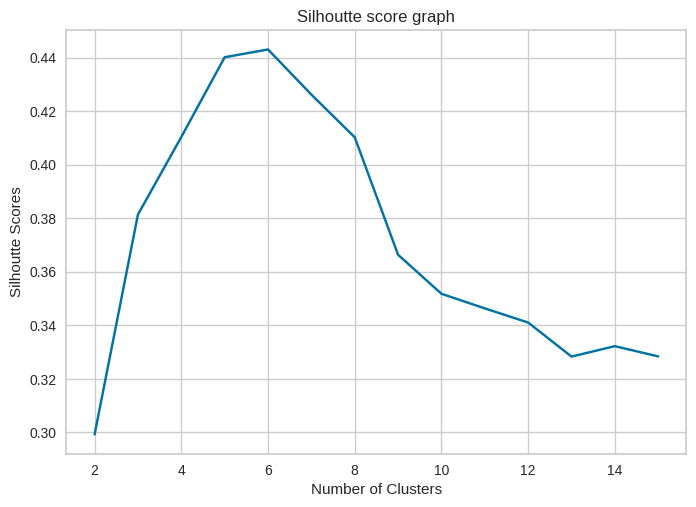

In [44]:
import matplotlib.pyplot as plt
plt.title("Silhoutte score graph")
plt.plot(ks,sil_scores)
plt.xlabel("Number of Clusters")
plt.ylabel("Silhoutte Scores")
plt.show()

## For 6 clusters, we are getting the maximum silhoutte score.

In [45]:
final_agc = AgglomerativeClustering(n_clusters=6)
final_agc.fit(Xnew)

AgglomerativeClustering(n_clusters=6)

In [46]:
final_agc.labels_

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 5, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 5,
       4, 5, 1, 5, 5, 5, 1, 5, 5, 1, 1, 1, 1, 1, 5, 1, 1, 5, 1, 1, 1, 5,
       1, 1, 5, 5, 1, 1, 1, 1, 1, 5, 1, 1, 5, 1, 1, 1, 1, 1, 5, 1, 1, 5,
       1, 1, 1, 5, 1, 1, 1, 5, 1, 5, 1, 5, 5, 1, 1, 5, 1, 5, 1, 1, 1, 1,
       1, 5, 1, 5, 5, 5, 1, 1, 1, 1, 5, 1, 1, 2, 5, 2, 0, 2, 0, 2, 0, 2,
       5, 2, 0, 2, 0, 2, 0, 2, 0, 2, 5, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2])

In [47]:
Xnew["Clusters"] = final_agc.labels_
Xnew.head()

,Age,Income,Spending,Clusters
0,19,15,39,4
1,21,15,81,3
2,20,16,6,4
3,23,16,77,3
4,31,17,40,4


## Dendrogram

<ipython-input-51-8497e640a6ac>:5: ClusterWarning:

The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix



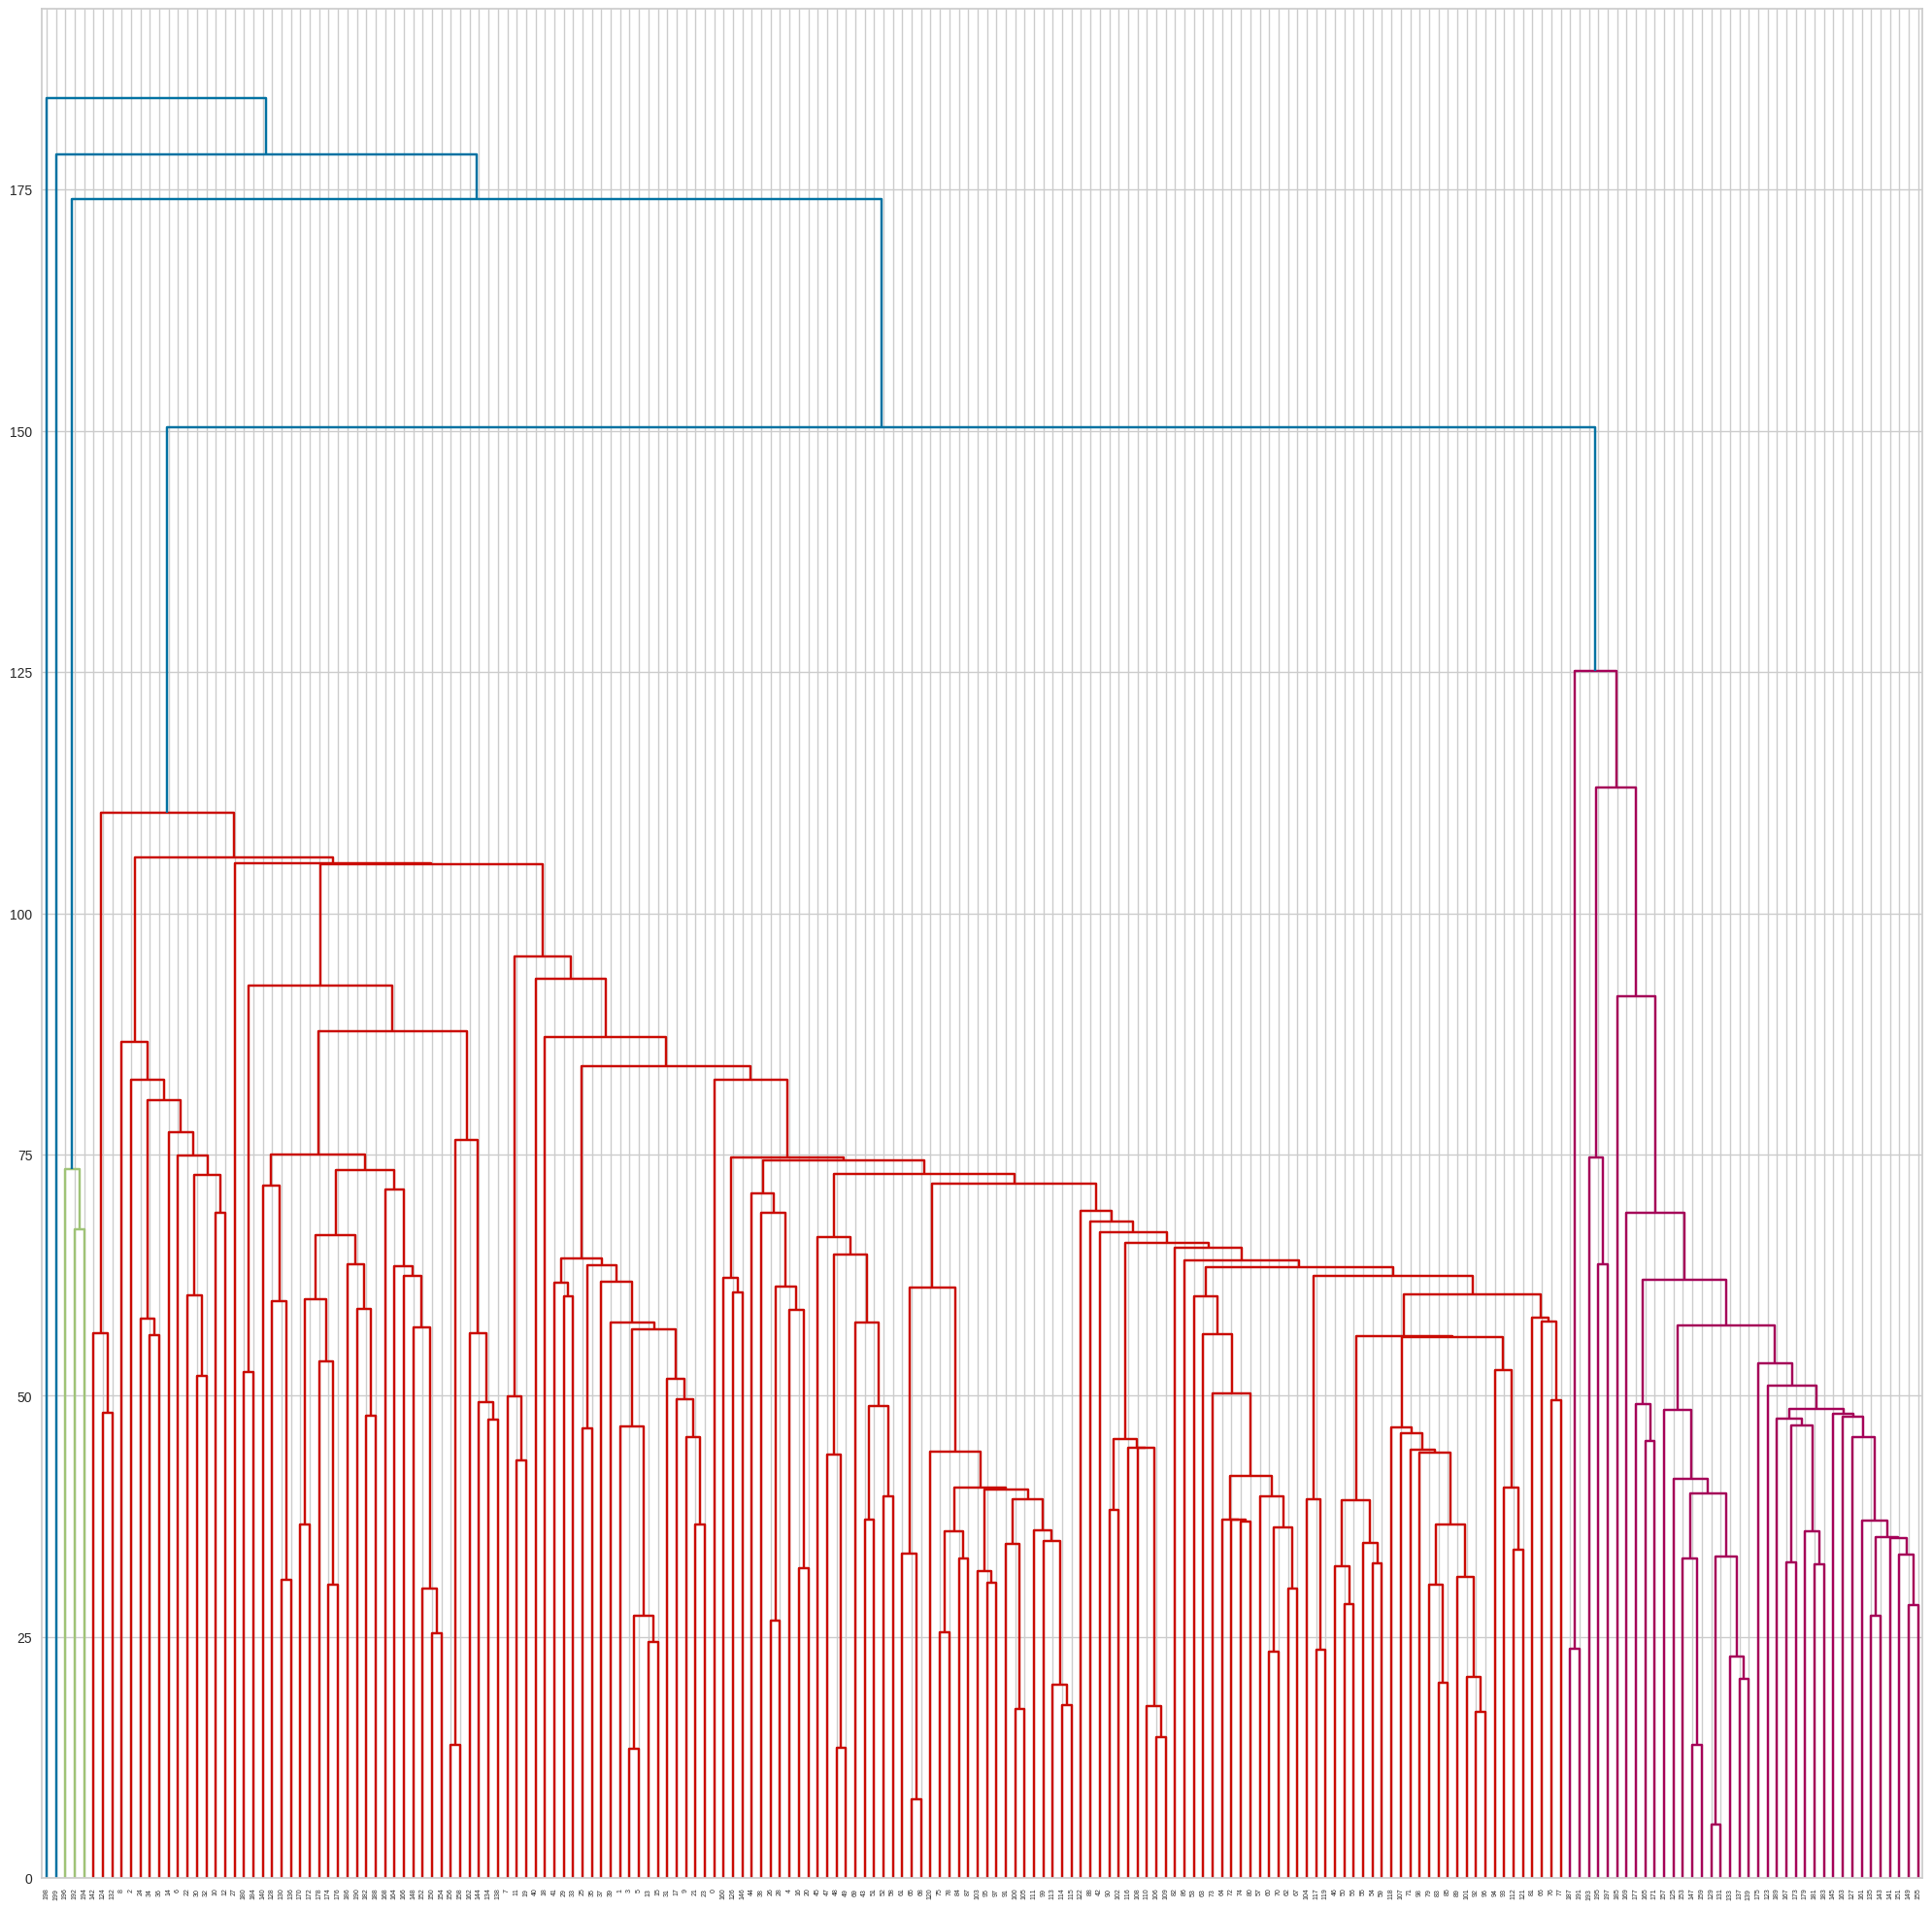

In [51]:
plt.figure(figsize=(25,25))
from scipy.spatial import distance_matrix
DM = distance_matrix(Xnew,Xnew)
from scipy.cluster.hierarchy import linkage
linkages = linkage(DM)
from scipy.cluster.hierarchy import dendrogram
Q = dendrogram(linkages)